# Olympic Sports and Medals - 1896 - 2012 - Kaggle

Lets analyse some data provided by **'The Guardian'** on **[Kaggle](https://www.kaggle.com/datasets/the-guardian/olympic-games?datasetId=707&sortBy=voteCount)**!

## Libraries and imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Loading Dataset

In [2]:
df_summer = pd.read_csv('summer.csv')

In [3]:
df_summer

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


Lets also check the dataset, whether we need to **change** any **Dtype** or **drop** any **Null/Nan** rows/columns.

In [4]:
df_summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [5]:
df_summer.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

In [6]:
df_summer[df_summer['Country'].isna()]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
29603,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold
31072,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold
31091,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver
31110,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver


### Drop NA rows

Seems like we have some NaN rows, lets drop them. 

In [7]:
df_summer.dropna(inplace = True)
df_summer.shape

(31161, 9)

In [8]:
df_summer.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       0
Gender        0
Event         0
Medal         0
dtype: int64

## Top Performers

First, lets see the biggest winners of all time at olympic games!

In [9]:
df_athletes = df_summer.groupby(['Country','Athlete', 'Sport', 'Gender'], as_index = False)['Medal'].count()
df_athletes = df_athletes.sort_values(by='Medal', ascending=False)
df_athletes_top20 = df_athletes.head(20)
df_athletes_top20

,Country,Athlete,Sport,Gender,Medal
21795,USA,"PHELPS, Michael",Aquatics,Men,22
18716,URS,"LATYNINA, Larisa",Gymnastics,Women,18
18098,URS,"ANDRIANOV, Nikolay",Gymnastics,Men,15
19164,URS,"SHAKHLIN, Boris",Gymnastics,Men,13
11527,ITA,"MANGIAROTTI, Edoardo",Fencing,Men,13
12350,JPN,"ONO, Takashi",Gymnastics,Men,13
22386,USA,"TORRES, Dara",Aquatics,Women,12
12152,JPN,"KATO, Sawao",Gymnastics,Men,12
20116,USA,"COUGHLIN, Natalie",Aquatics,Women,12
22355,USA,"THOMPSON, Jenny",Aquatics,Women,12


These are the biggest winners at olympic games from 1896 to 2012. Let's check how many athletes each of these countries have.  

In [10]:
df_athletes_ctop20 = df_athletes_top20.groupby(['Country'], as_index=False)['Athlete'].count()
df_athletes_ctop20 = df_athletes_ctop20.sort_values(by='Athlete', ascending = False)
df_athletes_ctop20

,Country,Athlete
7,USA,9
6,URS,4
3,JPN,2
0,FIN,1
1,GER,1
2,ITA,1
4,RUS,1
5,TCH,1


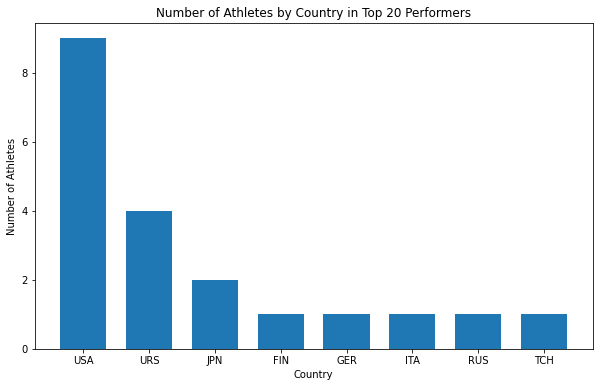

In [11]:
plt.figure(figsize = (10,6))
plt.bar(df_athletes_ctop20['Country'],sorted(df_athletes_ctop20['Athlete'], reverse=True),width=0.7)
plt.xlabel('Country')
plt.ylabel('Number of Athletes')
plt.title('Number of Athletes by Country in Top 20 Performers')
plt.show()

**Note:** URS is equivalent to Soviet Union and RUS is equivalent to Russia. Don't forget that some countries, including Russia, have changed their name during the observed period (1896 - 2012). 

### Top 20 Performers by gender

Now let's check how each gender perform by sport.

In [12]:
df_athletes_fm = df_athletes[df_athletes['Gender'] == 'Women']
df_athletes_fm20 = df_athletes_fm.head(20)
df_athletes_fm20

,Country,Athlete,Sport,Gender,Medal
18716,URS,"LATYNINA, Larisa",Gymnastics,Women,18
22386,USA,"TORRES, Dara",Aquatics,Women,12
20116,USA,"COUGHLIN, Natalie",Aquatics,Women,12
22355,USA,"THOMPSON, Jenny",Aquatics,Women,12
17495,TCH,"CASLAVSKA, Vera",Gymnastics,Women,11
9800,GER,"VAN ALMSICK, Franziska",Aquatics,Women,10
10351,HUN,"KELETI, Agnes",Gymnastics,Women,10
18120,URS,"ASTAKHOVA, Polina",Gymnastics,Women,10
11900,ITA,"VEZZALI, Valentina",Fencing,Women,9
639,AUS,"JONES, Leisel",Aquatics,Women,9


In [13]:
df_athletes_sp20 = df_athletes_fm20.groupby(['Sport'], as_index=False)['Medal'].sum()
df_athletes_sp20 = df_athletes_sp20.sort_values(by='Medal', ascending = False)
df_athletes_sp20

,Sport,Medal
5,Gymnastics,75
0,Aquatics,71
3,Equestrian,17
1,Athletics,9
4,Fencing,9
2,Canoe / Kayak,8
6,Rowing,8


We can confirm that, from top 20 female performers, most of medals are from Gymnastics and Aquatics.

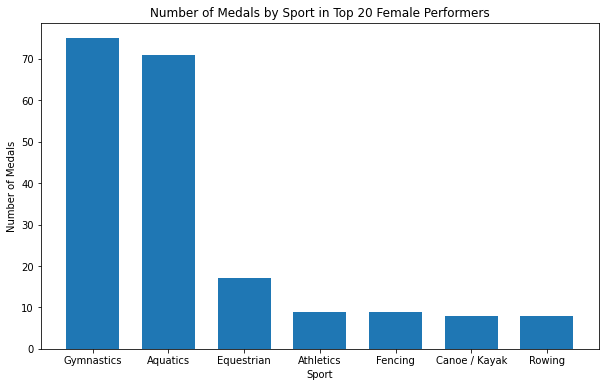

In [14]:
plt.figure(figsize = (10,6))
plt.bar(df_athletes_sp20['Sport'],sorted(df_athletes_sp20['Medal'], reverse=True),width=0.7)
plt.xlabel('Sport')
plt.ylabel('Number of Medals')
plt.title('Number of Medals by Sport in Top 20 Female Performers')
plt.show()

Now let's do the same analysis but for male gender.

In [15]:
df_athletes_ml = df_athletes[df_athletes['Gender'] == 'Men']
df_athletes_ml20 = df_athletes_ml.head(20)
df_athletes_ml20

,Country,Athlete,Sport,Gender,Medal
21795,USA,"PHELPS, Michael",Aquatics,Men,22
18098,URS,"ANDRIANOV, Nikolay",Gymnastics,Men,15
19164,URS,"SHAKHLIN, Boris",Gymnastics,Men,13
11527,ITA,"MANGIAROTTI, Edoardo",Fencing,Men,13
12350,JPN,"ONO, Takashi",Gymnastics,Men,13
12152,JPN,"KATO, Sawao",Gymnastics,Men,12
5392,FIN,"NURMI, Paavo",Athletics,Men,12
16142,RUS,"NEMOV, Alexei",Gymnastics,Men,12
19773,USA,"BIONDI, Matthew",Aquatics,Men,11
18287,URS,"CHUKARIN, Viktor Ivanovich",Gymnastics,Men,11


In [16]:
df_athletes_spm20 = df_athletes_ml20.groupby(['Sport'], as_index=False)['Medal'].sum()
df_athletes_spm20 = df_athletes_spm20.sort_values(by='Medal', ascending = False)
df_athletes_spm20

,Sport,Medal
3,Gymnastics,105
0,Aquatics,74
2,Fencing,23
1,Athletics,22
4,Shooting,11


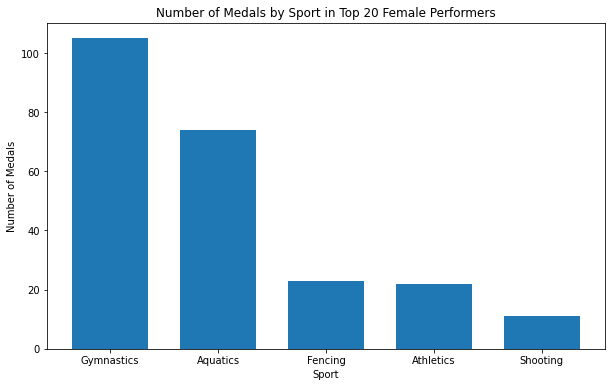

In [17]:
plt.figure(figsize = (10,6))
plt.bar(df_athletes_spm20['Sport'],sorted(df_athletes_spm20['Medal'], reverse=True),width=0.7)
plt.xlabel('Sport')
plt.ylabel('Number of Medals')
plt.title('Number of Medals by Sport in Top 20 Female Performers')
plt.show()

## USA performance by Gender through the years

Now lets analyse how male and female gender have performed through the years

In [18]:
# Male Filtering
df_USA_male = df_summer[(df_summer['Country'] == 'USA') & (df_summer['Gender'] == 'Men')]
df_USA_male = df_USA_male[["Year", "Sport", "Country", "Gender", "Event", "Medal"]].drop_duplicates()

# Filtering to male gold medals only
df_USA_male_gold = df_USA_male[df_USA_male['Medal'] == 'Gold']
df_USA_male_gold = df_USA_male_gold.groupby('Year', as_index=False)['Medal'].count()

# Filtering to male silver medals only
df_USA_male_silver = df_USA_male[df_USA_male['Medal'] == 'Silver']
df_USA_male_silver = df_USA_male_silver.groupby('Year', as_index=False)['Medal'].count()

# Filtering to male bronze medals only
df_USA_male_bronze = df_USA_male[df_USA_male['Medal'] == 'Bronze']
df_USA_male_bronze = df_USA_male_bronze.groupby('Year', as_index=False)['Medal'].count()

In [19]:
# Female Filtering
df_USA_female = df_summer[(df_summer['Country'] == 'USA') & (df_summer['Gender'] == 'Women')]
df_USA_female = df_USA_female[["Year", "Sport", "Country", "Gender", "Event", "Medal"]].drop_duplicates()

# Filtering to female gold medals only
df_USA_female_gold = df_USA_female[df_USA_female['Medal'] == 'Gold']
df_USA_female_gold = df_USA_female_gold.groupby('Year', as_index=False)['Medal'].count()

# Filtering to female silver medals only
df_USA_female_silver = df_USA_female[df_USA_female['Medal'] == 'Silver']
df_USA_female_silver = df_USA_female_silver.groupby('Year', as_index=False)['Medal'].count()

# Filtering to female bronze medals only
df_USA_female_bronze = df_USA_female[df_USA_female['Medal'] == 'Bronze']
df_USA_female_bronze = df_USA_female_bronze.groupby('Year', as_index=False)['Medal'].count()

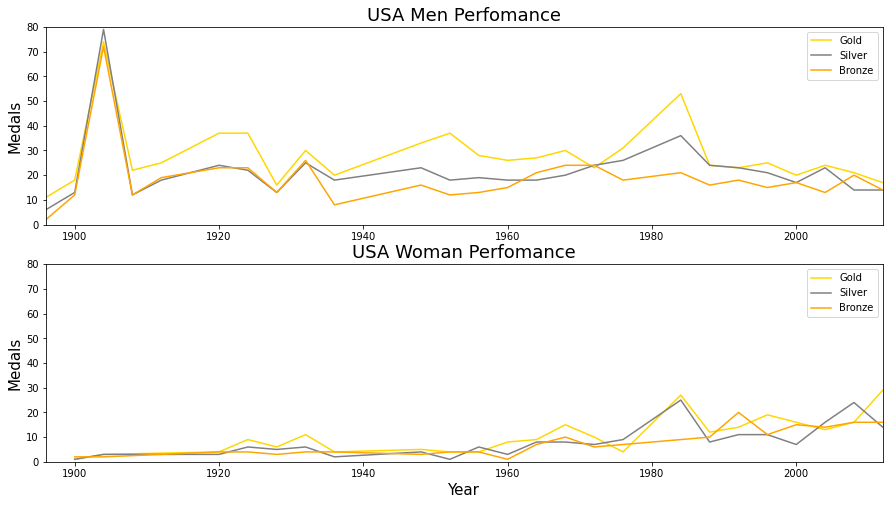

In [20]:
plt.figure(figsize = (15,8))

plt.subplot(2,1,1)
plt.plot(df_USA_male_gold['Year'], df_USA_male_gold['Medal'], color = 'gold')
plt.plot(df_USA_male_silver['Year'], df_USA_male_silver['Medal'], color = 'gray')
plt.plot(df_USA_male_bronze['Year'], df_USA_male_bronze['Medal'], color = 'orange')
plt.legend(["Gold", "Silver", "Bronze"])
plt.ylabel('Medals', fontdict={'fontsize': 15})
plt.title('USA Men Perfomance', fontdict={'fontsize': 18})
plt.ylim([0,80])
plt.xlim([1896,2012])

plt.subplot(2,1,2)
plt.plot(df_USA_female_gold['Year'], df_USA_female_gold['Medal'], color = 'gold')
plt.plot(df_USA_female_silver['Year'], df_USA_female_silver['Medal'], color = 'gray')
plt.plot(df_USA_female_bronze['Year'], df_USA_female_bronze['Medal'], color = 'orange')
plt.legend(["Gold", "Silver", "Bronze"])
plt.xlabel('Year', fontdict={'fontsize': 15})
plt.ylabel('Medals', fontdict={'fontsize': 15})
plt.title('USA Woman Perfomance', fontdict={'fontsize': 18})
plt.ylim([0,80])
plt.xlim([1896,2012])
plt.show()

We can notice that after 1960 Summer Olympic Games, USA womens started to have better performance, specially during 21st century, where women's performance started to be better than men's perfomance. 

## Perfomance by Country

For team-based sports we want to count medals only once, thus we will remove 'Athlete' column and drop duplicated rows.

In [21]:
df_summer_nathle = df_summer[["Year", "Sport", "Country", "Gender", "Event", "Medal"]].drop_duplicates()
df_summer_nathle

,Year,Sport,Country,Gender,Event,Medal
0,1896,Aquatics,HUN,Men,100M Freestyle,Gold
1,1896,Aquatics,AUT,Men,100M Freestyle,Silver
2,1896,Aquatics,GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Aquatics,GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Aquatics,GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...
31160,2012,Wrestling,POL,Men,Wg 84 KG,Bronze
31161,2012,Wrestling,IRI,Men,Wg 96 KG,Gold
31162,2012,Wrestling,RUS,Men,Wg 96 KG,Silver
31163,2012,Wrestling,ARM,Men,Wg 96 KG,Bronze


In [22]:
df_medals = df_summer_nathle.groupby(["Country", "Year"])["Medal"].count().unstack()
df_medals

Year,1896,1900,1904,1908,1912,1920,1924,1928,1932,1936,...,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012
Country,,,,,,,,,,,,,,,,,,,,,
AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
AHO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
ALG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,2.0,3.0,5.0,NaN,2.0,1.0
ANZ,NaN,NaN,NaN,5.0,7.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ARG,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,4.0,7.0,...,NaN,NaN,NaN,2.0,1.0,3.0,4.0,6.0,6.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VIE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN
YUG,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,1.0,...,8.0,9.0,18.0,12.0,NaN,4.0,3.0,NaN,NaN,NaN
ZAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN


### General performance of Top 20 Countries

In [23]:
df_medals = df_summer_nathle.groupby("Country", as_index=False)["Medal"].count()
df_medals = df_medals.sort_values(by='Medal', ascending=False).head(20)
df_medals

,Country,Medal
139,USA,2394
137,URS,986
47,GBR,792
44,FRA,659
50,GER,571
68,ITA,548
23,CHN,475
58,HUN,473
121,SWE,471
6,AUS,470


In [24]:
Countries = df_medals['Country'].to_list()
Medals = df_medals['Medal'].to_list()
Countries

['USA',
 'URS',
 'GBR',
 'FRA',
 'GER',
 'ITA',
 'CHN',
 'HUN',
 'SWE',
 'AUS',
 'GDR',
 'JPN',
 'RUS',
 'FIN',
 'ROU',
 'CAN',
 'NED',
 'POL',
 'KOR',
 'BUL']

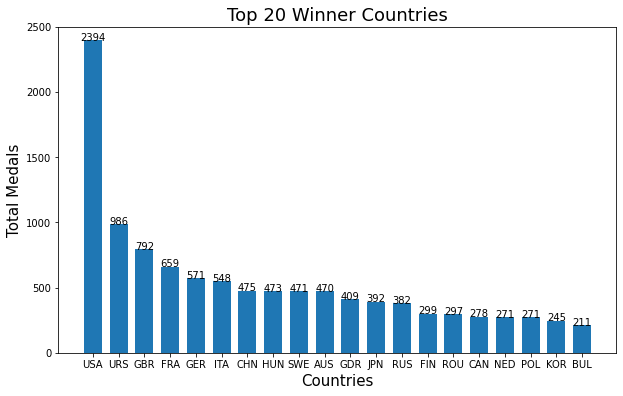

In [25]:
plt.figure(figsize = (10,6))
plt.bar(df_medals['Country'],sorted(df_medals['Medal'], reverse= True), width=0.7)
for i in range(len(Countries)):
        plt.text(i,Medals[i],Medals[i], ha='center')
plt.xlabel('Countries', fontdict={'fontsize': 15})
plt.ylabel('Total Medals', fontdict={'fontsize': 15})
plt.title('Top 20 Winner Countries', fontdict={'fontsize': 18})
plt.ylim([0,2500])
plt.show;

### Top 20 Countries by Type of Medal

Now lets check the performance by gold, silver and bronze medals by each of these countries.

In [26]:
# Filtering dataframes by type of medal (gold, silver and bronze)

df_summer_gold = df_summer_nathle[df_summer_nathle['Medal'] == 'Gold']
gold_countries = df_summer_gold.groupby(["Country"], as_index=False)["Medal"].count()
gold_countries = gold_countries[gold_countries['Country'].isin(Countries)]

df_summer_silver = df_summer_nathle[df_summer_nathle['Medal'] == 'Silver']
silver_countries = df_summer_silver.groupby(["Country"], as_index=False)["Medal"].count()
silver_countries = silver_countries[silver_countries['Country'].isin(Countries)]

df_summer_bronze = df_summer_nathle[df_summer_nathle['Medal'] == 'Bronze']
bronze_countries = df_summer_bronze.groupby(["Country"], as_index=False)["Medal"].count()
bronze_countries = bronze_countries[bronze_countries['Country'].isin(Countries)]

In [27]:
# Merging all dataframes

first_merge = pd.merge(bronze_countries, silver_countries,how='inner', on='Country')
medals_countries = pd.merge(first_merge, gold_countries,how='inner', on='Country')
medals_countries.rename(columns={'Medal_x': 'Bronze', 'Medal_y': 'Silver', 'Medal': 'Gold'}, inplace=True)
medals_countries = medals_countries.sort_values(by = 'Gold', ascending=False)
medals_countries = pd.merge(medals_countries, df_medals, how='inner', on='Country')
medals_countries.rename(columns={'Medal': 'Total Medals'}, inplace=True)
medals_countries

,Country,Bronze,Silver,Gold,Total Medals
0,USA,663,756,975,2394
1,URS,291,313,382,986
2,GBR,272,280,240,792
3,FRA,241,216,202,659
4,CHN,126,149,200,475
5,ITA,184,167,197,548
6,GER,215,182,174,571
7,HUN,163,144,166,473
8,GDR,127,129,153,409
9,AUS,176,153,141,470


In [28]:
Countries_type = medals_countries['Country'].to_list()
Medals_gold = medals_countries['Gold'].to_list()
Medals_silver = medals_countries['Silver'].to_list()
Medals_bronze = medals_countries['Bronze'].to_list()
Medals_total = medals_countries['Total Medals'].to_list()

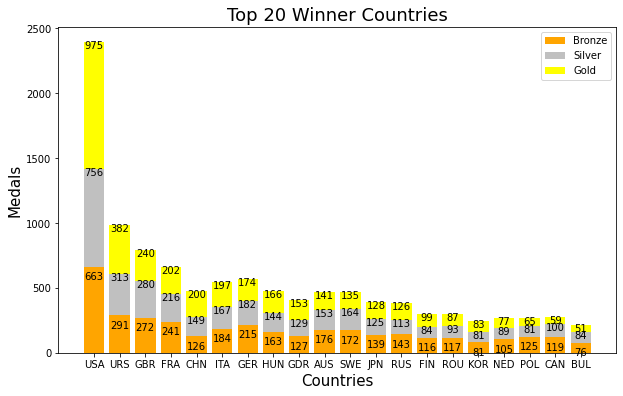

In [29]:
plt.figure(figsize = (10,6))
plt.bar(medals_countries['Country'], medals_countries['Bronze'],color = 'orange')
for i in range(len(Countries_type)):
        plt.text(i,Medals_bronze[i]-100,Medals_bronze[i], ha='center')
plt.bar(medals_countries['Country'], medals_countries['Silver'], bottom = medals_countries['Bronze'],color = 'silver')
for i in range(len(Countries_type)):
        plt.text(i,Medals_bronze[i]+Medals_silver[i]-50,Medals_silver[i], ha='center')
plt.bar(medals_countries['Country'], medals_countries['Gold'], bottom = medals_countries['Bronze'] + medals_countries['Silver'],color = 'yellow')
for i in range(len(Countries_type)):
        plt.text(i,Medals_total[i]-50,Medals_gold[i], ha='center')
plt.xlabel('Countries', fontdict={'fontsize': 15})
plt.ylabel('Medals', fontdict={'fontsize': 15})
plt.title('Top 20 Winner Countries', fontdict={'fontsize': 18})
plt.legend(["Bronze", "Silver", "Gold"])
plt.show()